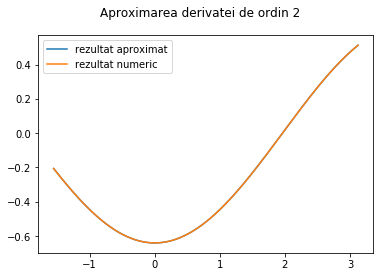

In [55]:
#Problema 1

import numpy as np
import matplotlib.pyplot as plt

# intervalele pe care este definita functia
a = -np.pi / 2
b =  np.pi

# definesc f(x) si derivata de ordin 2 a lui f
def f(x):
    return np.cos(-0.8 * x)

def f_dublu_derivat(x):
    return -0.64 * np.cos(0.8 * x)

# determin N minim astfel incat abs(eroarea de trunchiere) <= 1e − 5.
N = 277
x = np.linspace(a, b, N)

# calculez aproximarea functiei 
def f_dublu_derivat_aproximare(x):
    h = x[1] - x[0]
    y = f(x)
    y2 = np.zeros(len(y) - 2)
   
    for i in range(1, len(x) - 1):
        y2[i - 1] = (y[i + 1] - 2 * y[i] + y[i - 1]) / (h * h)

    return y2

# exclud capetele
x_interior = x[1:-1]

# calculez valoarea functiei reale si valoarea celei aproximate si le reprezint pe grafic
y_real = f_dublu_derivat(x_interior)
y_approx = f_dublu_derivat_aproximare(x)

plt.suptitle('Aproximarea derivatei de ordin 2')
plt.plot(x_interior, y_real, label='rezultat aproximat')
plt.plot(x_interior, y_approx, label='rezultat numeric')
plt.legend()
plt.show()


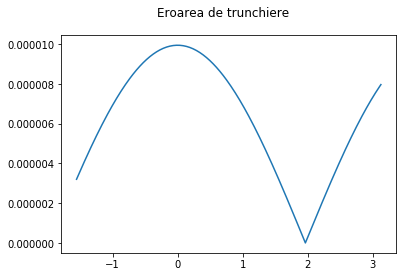

N a fost ales corect


In [53]:
# calculez eroarea si verific daca eroarea in modul este <= 1e-5

error = np.abs(y_approx - y_real)
max_error = np.max(np.abs(error))
plt.suptitle('Eroarea de trunchiere')
plt.plot(x_interior, error)
plt.show()

if max_error>1e-5:
    print ("Alegeti o valoare mai mare pentru N")
else:
    print("N a fost ales corect")


Valoarea integralei folosind metoda trapezului, pentru N =  17 este 1.0000065244985856
Valoarea integralei folosind metoda trapezului, pentru N =  17 este 1.0850046370702153
Valoarea integralei folosind metoda trapezului, pentru N =  17 este 0.9716738203080422


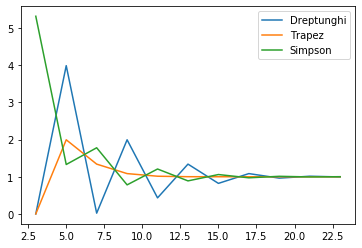

In [73]:
# Problema 2

def integrare(f, x, metoda):
    # Calculam f(x) pentru punctele alese
    y = f(x)
    h = x[1] - x[0]
    
    if metoda == 'dreptunghi':
        I = 2 * h * np.sum(y[::2])
    elif metoda == 'trapez':
        I = h/2 * (y[0] + 2 * np.sum(y[1:-2]) + y[-1])
    elif metoda == 'simpson':
        I = h/3 * (y[0] + 4 * np.sum(y[1:-1:2]) + 2 * np.sum(y[2:-1:2]) + y[-1])
    else:
        raise Exception('Metodă necunoscută')

    return I

a = -19
b =  19
sigma = 1.9

f = lambda x: 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-(x ** 2) / (2 * (sigma ** 2)))

N = 17
x = np.linspace(a, b, N)

print('Valoarea integralei folosind metoda trapezului, pentru N = ', N , 'este', integrare(f, x, 'trapez'))
print('Valoarea integralei folosind metoda trapezului, pentru N = ', N , 'este', integrare(f, x, 'dreptunghi'))
print('Valoarea integralei folosind metoda trapezului, pentru N = ', N , 'este', integrare(f, x, 'simpson'))


N_min = 3
N_max = 25
N_range = range(N_min, N_max, 2)

# retin valorile pentru a putea construi un grafic cu ele
def valori(metoda):
    valori_integrala = []
    for N in range(N_min, N_max, 2):
        x = np.linspace(a, b, N)
        I = integrare(f, x, metoda)
        valori_integrala.append(I)
    return valori_integrala

# afisez graficul cu aceste valori
plt.plot(N_range, valori('dreptunghi'), label='Dreptunghi')
plt.plot(N_range, valori('trapez'), label='Trapez')
plt.plot(N_range, valori('simpson'), label='Simpson')
plt.legend()
plt.show()